In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

In [2]:
def transform_week(df):
    weekday = []
    for row in range(len(df)):
        if df[row] == 0:
            weekday.append([0,0,0,0,0,0,1])
        elif df[row] == 1:
            weekday.append([0,0,0,0,0,1,0])
        elif df[row] == 2:
            weekday.append([0,0,0,0,1,0,0])
        elif df[row] == 3:
            weekday.append([0,0,0,1,0,0,0])
        elif df[row] == 4:
            weekday.append([0,0,1,0,0,0,0])
        elif df[row] == 5: 
            weekday.append([0,1,0,0,0,0,0])
        elif df[row] == 6: 
            weekday.append([1,0,0,0,0,0,0])
        
    weekday_np = np.array(weekday)        
    return weekday_np

In [3]:
def transform_triptype(df):
    triptype = []
    for row in range(len(df)):
        if df[row] == 0:
            triptype.append([0,0,0,0,0,1])
        elif df[row] == 1:
            triptype.append([0,0,0,0,1,0])
        elif df[row] == 2:
            triptype.append([0,0,0,1,0,0])
        elif df[row] == 3:
            triptype.append([0,0,1,0,0,0])
        elif df[row] == 4:
            triptype.append([0,1,0,0,0,0])
        elif df[row] == 5: 
            triptype.append([1,0,0,0,0,0])
        
    triptype_np = np.array(triptype)        
    return triptype_np

In [4]:
def transform_min(df):
    minute = []
    for row in range(len(df)):
        if df[row] == 0:
            minute.append([0,0,1])
        elif df[row] == 20:
            minute.append([0,1,0])
        elif df[row] == 40:
            minute.append([1,0,0])

        
    minute_np = np.array(minute)        
    return minute_np

In [5]:
ori = pd.read_csv('/home/yuan/Dropbox/nerual network/training_20min_avg_travel_time_addWeather.csv')
ori

,Unnamed: 0,intersection_id,tollgate_id,time_window,avg_travel_time,valuePrecipitation,wind_direction,wind_speed,temperature,rel_humidity
0,0,B,3,"[2016-07-19 00:00:00,2016-07-19 00:20:00)",70.85,0.0,219,3.3,27.5,81
1,1,B,3,"[2016-07-19 00:20:00,2016-07-19 00:40:00)",148.79,0.0,219,3.3,27.5,81
2,2,B,3,"[2016-07-19 01:40:00,2016-07-19 02:00:00)",93.72,0.0,219,3.3,27.5,81
3,3,B,3,"[2016-07-19 02:00:00,2016-07-19 02:20:00)",67.81,0.0,212,3.8,31.7,65
4,4,B,3,"[2016-07-19 02:40:00,2016-07-19 03:00:00)",167.55,0.0,212,3.8,31.7,65
5,5,B,3,"[2016-07-19 03:40:00,2016-07-19 04:00:00)",98.49,0.0,212,3.8,31.7,65
6,6,B,3,"[2016-07-19 04:00:00,2016-07-19 04:20:00)",96.67,0.0,212,3.8,31.7,65
7,7,B,3,"[2016-07-19 04:20:00,2016-07-19 04:40:00)",53.15,0.0,212,3.8,31.7,65
8,8,B,3,"[2016-07-19 04:40:00,2016-07-19 05:00:00)",55.25,0.0,212,3.8,31.7,65
9,9,B,3,"[2016-07-19 05:00:00,2016-07-19 05:20:00)",209.66,0.0,239,1.9,31.8,64


In [6]:
train = pd.read_csv('/home/yuan/Dropbox/nerual network/training_20min_avg_travel_time_addWeather_removeVocationDay.csv')
train = train.drop(train.columns[0], axis=1)

In [7]:
train['extr_time'] = pd.to_datetime(train['time_window'].apply(lambda x: x.strip('[)').split(',')[0]))
train['hour'] = train['extr_time'].dt.hour
train['min'] = train['extr_time'].dt.minute
train['week'] = train['extr_time'].dt.weekday


In [8]:
hr_min = []
for row in range(len(train)):
    hr_min.append(str(train['hour'][row])+'-'+str(train['min'][row]))
    
train['hr_min'] = hr_min    

In [9]:
train['trip_type'] = float('NaN')
train['trip_type'][(train['intersection_id']=='A') & (train['tollgate_id']==2)] = 0
train['trip_type'][(train['intersection_id']=='A') & (train['tollgate_id']==3)] = 1
train['trip_type'][(train['intersection_id']=='B') & (train['tollgate_id']==1)] = 2
train['trip_type'][(train['intersection_id']=='B') & (train['tollgate_id']==3)] = 3
train['trip_type'][(train['intersection_id']=='C') & (train['tollgate_id']==1)] = 4
train['trip_type'][(train['intersection_id']=='C') & (train['tollgate_id']==3)] = 5

/home/yuan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/yuan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/yuan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/yuan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__

In [10]:
train.dtypes

intersection_id               object
tollgate_id                    int64
time_window                   object
avg_travel_time              float64
valuePrecipitation           float64
wind_direction                 int64
wind_speed                   float64
temperature                  float64
rel_humidity                   int64
extr_time             datetime64[ns]
hour                           int64
min                            int64
week                           int64
hr_min                        object
trip_type                    float64
dtype: object

### Preprocssing

In [11]:
from sklearn import preprocessing

In [12]:
##remove outlier
train = train[train['wind_direction']<=360].reset_index()

##normalize
train['valuePrecipitation'] = preprocessing.scale(train['valuePrecipitation'])
train['wind_direction'] = preprocessing.scale(train['wind_direction'])
train['wind_speed'] = preprocessing.scale(train['wind_speed'])
train['temperature'] = preprocessing.scale(train['temperature'])
train['rel_humidity'] = preprocessing.scale(train['rel_humidity'])

/home/yuan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [13]:
##after normalization
train

,index,intersection_id,tollgate_id,time_window,avg_travel_time,valuePrecipitation,wind_direction,wind_speed,temperature,rel_humidity,extr_time,hour,min,week,hr_min,trip_type
0,0,B,3,"[2016-07-19 00:00:00,2016-07-19 00:20:00)",70.85,-0.121132,0.528562,0.960857,0.336900,0.645087,2016-07-19 00:00:00,0,0,1,0-0,3.0
1,1,B,3,"[2016-07-19 00:20:00,2016-07-19 00:40:00)",148.79,-0.121132,0.528562,0.960857,0.336900,0.645087,2016-07-19 00:20:00,0,20,1,0-20,3.0
2,2,B,3,"[2016-07-19 01:40:00,2016-07-19 02:00:00)",93.72,-0.121132,0.528562,0.960857,0.336900,0.645087,2016-07-19 01:40:00,1,40,1,1-40,3.0
3,3,B,3,"[2016-07-19 02:00:00,2016-07-19 02:20:00)",67.81,-0.121132,0.471205,1.331126,0.725933,0.094981,2016-07-19 02:00:00,2,0,1,2-0,3.0
4,4,B,3,"[2016-07-19 02:40:00,2016-07-19 03:00:00)",167.55,-0.121132,0.471205,1.331126,0.725933,0.094981,2016-07-19 02:40:00,2,40,1,2-40,3.0
5,5,B,3,"[2016-07-19 03:40:00,2016-07-19 04:00:00)",98.49,-0.121132,0.471205,1.331126,0.725933,0.094981,2016-07-19 03:40:00,3,40,1,3-40,3.0
6,6,B,3,"[2016-07-19 04:00:00,2016-07-19 04:20:00)",96.67,-0.121132,0.471205,1.331126,0.725933,0.094981,2016-07-19 04:00:00,4,0,1,4-0,3.0
7,7,B,3,"[2016-07-19 04:20:00,2016-07-19 04:40:00)",53.15,-0.121132,0.471205,1.331126,0.725933,0.094981,2016-07-19 04:20:00,4,20,1,4-20,3.0
8,8,B,3,"[2016-07-19 04:40:00,2016-07-19 05:00:00)",55.25,-0.121132,0.471205,1.331126,0.725933,0.094981,2016-07-19 04:40:00,4,40,1,4-40,3.0
9,9,B,3,"[2016-07-19 05:00:00,2016-07-19 05:20:00)",209.66,-0.121132,0.692441,-0.075897,0.735196,0.060600,2016-07-19 05:00:00,5,0,1,5-0,3.0


## Plot test

<IPython.core.display.Javascript object>


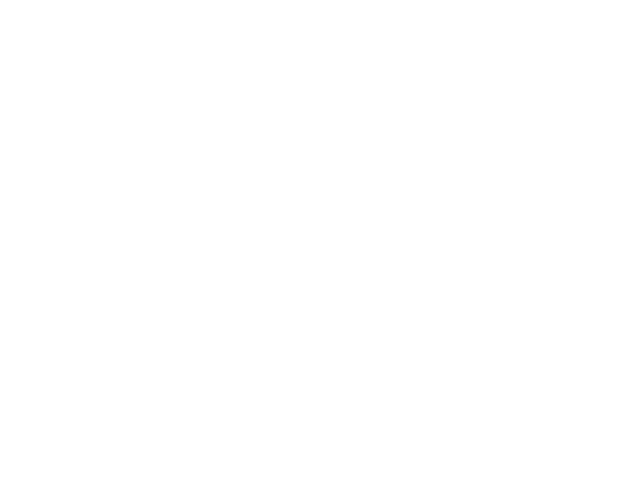

In [14]:
train[train['hour']==7].boxplot(column=['avg_travel_time'])

In [15]:
train[train['hour']==7]['avg_travel_time'].describe([.023,.16,.5,.84,.977])

count    1047.000000
mean      121.339140
std        57.388274
min        14.900000
2.3%       45.756100
16%        66.306800
50%       112.470000
84%       173.148400
97.7%     252.786920
max       681.520000
Name: avg_travel_time, dtype: float64

In [16]:
train[train['hour']==7].boxplot(column=['avg_travel_time'])

In [17]:
train[train['hour']==8].boxplot(column=['avg_travel_time'])

In [18]:
train[train['hour']==9].boxplot(column=['avg_travel_time'])

In [19]:
train[train['hr_min']=='6-0']['avg_travel_time'].describe([.023,.16,.5,.84,.977])

count    263.000000
mean     105.144563
std       64.498620
min       18.700000
2.3%      34.690920
16%       49.324400
50%       96.600000
84%      154.614400
97.7%    229.793740
max      639.440000
Name: avg_travel_time, dtype: float64

In [20]:
train.shape

(20734, 16)

In [21]:
train_week = transform_week(train['week'])
train_trip = transform_triptype(train['trip_type'])
train_min = transform_min(train['min'])

In [22]:
day1 = train[train['week']==0]
day2 = train[train['week']==1]
day3 = train[train['week']==2]
day4 = train[train['week']==3]
day5 = train[train['week']==4]
day6 = train[train['week']==5]
day7 = train[train['week']==6]

In [23]:
day1['avg_travel_time'].describe()

count    3161.000000
mean      120.697295
std        72.160624
min        11.970000
25%        76.950000
50%       109.090000
75%       146.950000
max      1413.940000
Name: avg_travel_time, dtype: float64

In [24]:
avgtime=[]
avg_index = []
for i in range(0,24):
    avgtime.append(train[train['hour']==i]['avg_travel_time'].mean())
    avg_index.append(i)

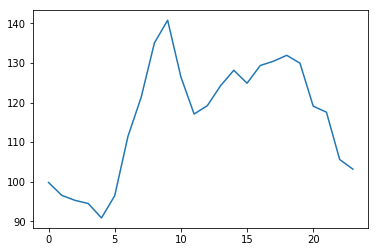

In [25]:
%matplotlib inline
plt.plot(avg_index, avgtime)
plt.show()

In [26]:
time_idex =[]
for i in range(0,24):
    time_idex.append(i)

In [27]:
def caltime(df):
    avg_24 = []
    for i in range(0,24):
        avg_24.append(df[df['hour']==i]['avg_travel_time'].mean())
        
    return avg_24

In [28]:
line1 = train[train['trip_type']==0].reset_index()
line2 = train[train['trip_type']==1].reset_index()
line3 = train[train['trip_type']==2].reset_index()
line4 = train[train['trip_type']==3].reset_index()
line5 = train[train['trip_type']==4].reset_index()
line6 = train[train['trip_type']==5].reset_index()

In [29]:
line1_time = caltime(line1)
line2_time = caltime(line2)
line3_time = caltime(line3)
line4_time = caltime(line4)
line5_time = caltime(line5)
line6_time = caltime(line6)

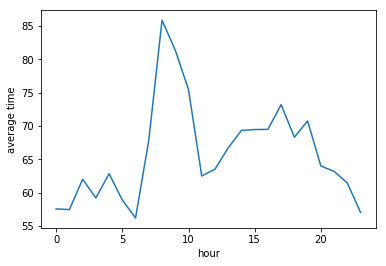

In [30]:
plt.plot(time_idex,line1_time)
plt.xlabel('hour')
plt.ylabel('average time')
plt.show()

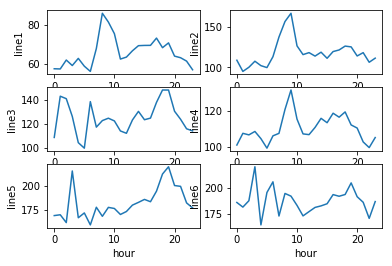

In [31]:
plt.subplot(3,2,1)
plt.xlabel('hour')
plt.ylabel('line1')
plt.plot(time_idex, line1_time)

plt.subplot(3,2,2)
plt.xlabel('hour')
plt.ylabel('line2')
plt.plot(time_idex, line2_time)

plt.subplot(3,2,3)
plt.xlabel('hour')
plt.ylabel('line3')
plt.plot(time_idex, line3_time)

plt.subplot(3,2,4)
plt.xlabel('hour')
plt.ylabel('line4')
plt.plot(time_idex, line4_time)

plt.subplot(3,2,5)
plt.xlabel('hour')
plt.ylabel('line5')
plt.plot(time_idex, line5_time)

plt.subplot(3,2,6)
plt.xlabel('hour')
plt.ylabel('line6')
plt.plot(time_idex, line6_time)

plt.show()



In [32]:
line1['avg_travel_time'].describe()

count    5053.000000
mean       66.525401
std        31.515919
min        10.600000
25%        51.100000
50%        61.320000
75%        74.320000
max       864.520000
Name: avg_travel_time, dtype: float64

In [33]:
line2['avg_travel_time'].describe()

count    4462.00000
mean      120.65944
std        59.50120
min        21.97000
25%        93.51000
50%       109.19500
75%       130.70750
max      1413.94000
Name: avg_travel_time, dtype: float64

### Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

/home/yuan/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
clf = RandomForestRegressor()

my_forest = clf.fit(feature, target)
my_forest.feature_importances_

### MLP neural net

In [36]:
from sklearn.neural_network import MLPRegressor

In [37]:
mlp_clf = MLPRegressor()

In [38]:
mlp_clf2 = MLPRegressor(activation= 'logistic', learning_rate_init= 0.005, hidden_layer_sizes= 300)

## 以路線分開訓練 計算MAPE

In [39]:
import xgboost as xgb

In [40]:
%%time
##line1
#l1 = MLPRegressor(activation= 'logistic', learning_rate_init= 0.005, hidden_layer_sizes= 300)
l1 = MLPRegressor()
#l1 = RandomForestRegressor()
feature = line1[['valuePrecipitation','wind_speed','temperature','rel_humidity','hour']].values
target = line1['avg_travel_time'].values

line1_week = transform_week(line1['week'])
#line1_trip = transform_triptype(line1['trip_type'])
#line1_min = transform_min(line1['min'])
feature_line1 = np.column_stack((feature, line1_week))
#feature_line1 = np.column_stack((feature_line1, line1_trip))
#feature_line1 = np.column_stack((feature_line1, line1_min))
X_train, X_test, y_train, y_test = train_test_split(feature_line1, target, test_size=0.2, random_state=42)

mlp = l1.fit(X_train,y_train)
pred_mlp = mlp.predict(X_test)
error = abs(pred_mlp - y_test) / y_test
map1 = error.mean()
map1

CPU times: user 1.57 s, sys: 3.46 s, total: 5.02 s
Wall time: 1.76 s


In [41]:
%%time
#l2 = MLPRegressor(activation= 'logistic', learning_rate_init= 0.005, hidden_layer_sizes= 300)
l2 = MLPRegressor()
#l2 = RandomForestRegressor()

feature = line2[['valuePrecipitation','wind_speed','temperature','rel_humidity','hour']].values
target = line2['avg_travel_time'].values

line2_week = transform_week(line2['week'])
#line2_trip = transform_triptype(line2['trip_type'])
#line2_min = transform_min(line2['min'])
feature_line2 = np.column_stack((feature, line2_week))
#feature_line2 = np.column_stack((feature_line2, line2_trip))
#feature_line2 = np.column_stack((feature_line2, line2_min))
X_train, X_test, y_train, y_test = train_test_split(feature_line2, target, test_size=0.2, random_state=42)

mlp = l1.fit(X_train,y_train)
pred_mlp = mlp.predict(X_test)
error = abs(pred_mlp - y_test) / y_test
map2 = error.mean()
map2

CPU times: user 2.16 s, sys: 4.32 s, total: 6.48 s
Wall time: 2.06 s


In [42]:
%%time
#l3 = MLPRegressor(activation= 'logistic', learning_rate_init= 0.005, hidden_layer_sizes= 300)
l3 = MLPRegressor()
#l3 = RandomForestRegressor()

feature = line3[['valuePrecipitation','wind_speed','temperature','rel_humidity','hour']].values
target = line3['avg_travel_time'].values

line3_week = transform_week(line3['week'])
#line3_trip = transform_triptype(line3['trip_type'])
#line3_min = transform_min(line3['min'])
feature_line3 = np.column_stack((feature, line3_week))
#feature_line3 = np.column_stack((feature_line3, line3_trip))
#feature_line3 = np.column_stack((feature_line3, line3_min))
X_train, X_test, y_train, y_test = train_test_split(feature_line3, target, test_size=0.2, random_state=42)

mlp = l1.fit(X_train,y_train)
pred_mlp = mlp.predict(X_test)
error = abs(pred_mlp - y_test) / y_test
map3 = error.mean()
map3

CPU times: user 1.96 s, sys: 4.57 s, total: 6.53 s
Wall time: 1.96 s


/home/yuan/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [43]:
%%time
#l4 = MLPRegressor(activation= 'logistic', learning_rate_init= 0.005, hidden_layer_sizes= 300)
l4 = MLPRegressor()
#l4 = RandomForestRegressor()

feature = line4[['valuePrecipitation','wind_speed','temperature','rel_humidity','hour']].values
target = line4['avg_travel_time'].values

line4_week = transform_week(line4['week'])
#line4_trip = transform_triptype(line4['trip_type'])
#line4_min = transform_min(line4['min'])
feature_line4 = np.column_stack((feature, line4_week))
#feature_line4 = np.column_stack((feature_line4, line4_trip))
#feature_line4 = np.column_stack((feature_line4, line4_min))
X_train, X_test, y_train, y_test = train_test_split(feature_line4, target, test_size=0.2, random_state=42)

mlp = l1.fit(X_train,y_train)
pred_mlp = mlp.predict(X_test)
error = abs(pred_mlp - y_test) / y_test
map4 = error.mean()
map4

CPU times: user 1.97 s, sys: 4.48 s, total: 6.45 s
Wall time: 2.03 s


In [44]:
%%time
#l5 = MLPRegressor(activation= 'logistic', learning_rate_init= 0.005, hidden_layer_sizes= 300)
l5 = MLPRegressor()
#l5 = RandomForestRegressor()

feature = line5[['valuePrecipitation','wind_speed','temperature','rel_humidity','hour']].values
target = line5['avg_travel_time'].values

line5_week = transform_week(line5['week'])
#line5_trip = transform_triptype(line5['trip_type'])
#line5_min = transform_min(line5['min'])
feature_line5 = np.column_stack((feature, line5_week))
#feature_line5 = np.column_stack((feature_line5, line5_trip))
#feature_line5 = np.column_stack((feature_line5, line5_min))
X_train, X_test, y_train, y_test = train_test_split(feature_line5, target, test_size=0.2, random_state=42)

mlp = l1.fit(X_train,y_train)
pred_mlp = mlp.predict(X_test)
error = abs(pred_mlp - y_test) / y_test
map5 = error.mean()
map5

CPU times: user 1.72 s, sys: 2.77 s, total: 4.49 s
Wall time: 1.17 s


In [45]:
%%time
#l6 = MLPRegressor(activation= 'logistic', learning_rate_init= 0.005, hidden_layer_sizes= 300)
l6 = MLPRegressor()
#l6 = RandomForestRegressor()

feature = line6[['valuePrecipitation','wind_speed','temperature','rel_humidity','hour']].values
target = line6['avg_travel_time'].values

line6_week = transform_week(line6['week'])
#line6_trip = transform_triptype(line6['trip_type'])
#line6_min = transform_min(line6['min'])
feature_line6 = np.column_stack((feature, line6_week))
#feature_line6 = np.column_stack((feature_line6, line6_trip))
#feature_line6 = np.column_stack((feature_line6, line6_min))
X_train, X_test, y_train, y_test = train_test_split(feature_line6, target, test_size=0.2, random_state=42)

mlp = l1.fit(X_train,y_train)
pred_mlp = mlp.predict(X_test)
error = abs(pred_mlp - y_test) / y_test
map6 = error.mean()
map6

CPU times: user 1.34 s, sys: 2.86 s, total: 4.2 s
Wall time: 1.26 s


In [46]:
x = [1,2,3,4,5,6]
y = [map1,map2,map3,map4,map5,map6]

<IPython.core.display.Javascript object>


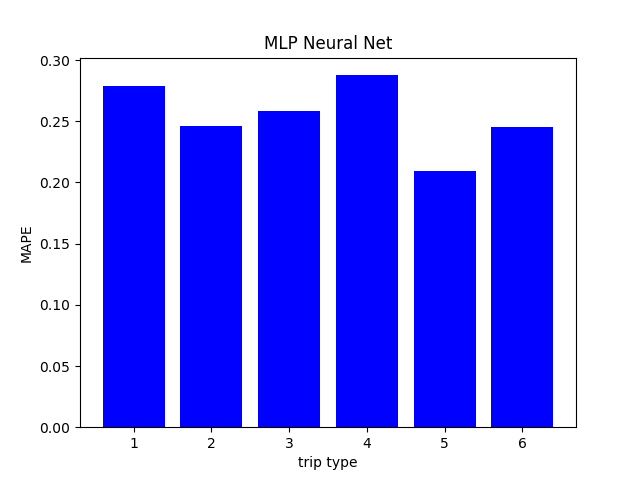

In [47]:
%matplotlib notebook
plt.bar(x,y, color='b')
plt.ylabel('MAPE')
plt.xlabel('trip type')
plt.title('MLP Neural Net')

### Calculate training error

In [ ]:
feature = train[['valuePrecipitation','wind_speed','temperature','rel_humidity','hour']].values

In [ ]:
target = train['avg_travel_time'].values

In [ ]:
print train_week.shape
print train_trip.shape
print feature.shape

In [ ]:
## 增加額外的numpy array 當feature
feature_train = np.column_stack((feature, train_week))
feature_train = np.column_stack((feature_train, train_trip))
feature_train = np.column_stack((feature_train, train_min))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature_train, target, test_size=0.2, random_state=42)


In [ ]:
##random forest
forest = clf.fit(X_train,y_train)
pred_forest = forest.predict(X_test)
error = abs(pred_forest - y_test) / y_test
error.mean()

In [ ]:
##MLP
mlp = mlp_clf.fit(X_train,y_train)
pred_mlp = mlp.predict(X_test)
error = abs(pred_mlp - y_test) / y_test
error.mean()

In [ ]:
##MLP
mlp2 = mlp_clf2.fit(X_train,y_train)
pred_mlp = mlp2.predict(X_test)
error = abs(pred_mlp - y_test) / y_test
error.mean()

In [ ]:
%%time
##grid search

from sklearn.model_selection import GridSearchCV

parameter = {
    'learning_rate_init': [0.05, 0.01, 0.005, 0.001],
    'hidden_layer_sizes': [100, 200, 300],
    'activation': ["logistic", "tanh", "relu"]}

gs_mlp = GridSearchCV(mlp_clf, parameter)
gs_mlp.fit(feature_train, target)
print 'best param: ', gs_mlp.best_params_ 
print 'best train score: ', gs_mlp.best_score_
print 'Test score: ', gs_mlp.best_estimator_.score(feature_train, target)

In [ ]:
gs_mlp.grid_scores_

### Predict true data speed

In [ ]:
sample = pd.read_csv('/home/yuan/Dropbox/nerual network/NewPredictTime/submission2_sample_travelTime_addWeather.csv')
answer = pd.read_csv('/home/yuan/Dropbox/nerual network/NewPredictTime/submission2_sample_travelTime.csv')
sample

In [ ]:
sample['extr_time'] = pd.to_datetime(sample['time_window'].apply(lambda x: x.strip('[)').split(',')[0]))
sample['hour'] = sample['extr_time'].dt.hour
sample['min'] = sample['extr_time'].dt.minute
sample['week'] = sample['extr_time'].dt.weekday


In [ ]:
sample['trip_type'] = float('NaN')
sample['trip_type'][(sample['intersection_id']=='A') & (sample['tollgate_id']==2)] = 0
sample['trip_type'][(sample['intersection_id']=='A') & (sample['tollgate_id']==3)] = 1
sample['trip_type'][(sample['intersection_id']=='B') & (sample['tollgate_id']==1)] = 2
sample['trip_type'][(sample['intersection_id']=='B') & (sample['tollgate_id']==3)] = 3
sample['trip_type'][(sample['intersection_id']=='C') & (sample['tollgate_id']==1)] = 4
sample['trip_type'][(sample['intersection_id']=='C') & (sample['tollgate_id']==3)] = 5

In [ ]:
hr_min = []
for row in range(len(sample)):
    hr_min.append(str(sample['hour'][row])+'-'+str(sample['min'][row]))
    
sample['hr_min'] = hr_min    

In [ ]:
##normalize
sample['valuePrecipitation'] = preprocessing.scale(sample['valuePrecipitation'])
sample['wind_direction'] = preprocessing.scale(sample['wind_direction'])
sample['wind_speed'] = preprocessing.scale(sample['wind_speed'])
sample['temperature'] = preprocessing.scale(sample['temperature'])
sample['rel_humidity'] = preprocessing.scale(sample['rel_humidity'])

In [ ]:
feature_test = sample[['valuePrecipitation','wind_speed','temperature','rel_humidity','hour']].values

In [ ]:
test_week = transform_week(sample['week'])
test_trip = transform_triptype(sample['trip_type'])
test_min = transform_min(sample['min'])

feature_test = np.column_stack((feature_test, test_week))
feature_test = np.column_stack((feature_test, test_trip))
feature_test = np.column_stack((feature_test, test_min))

In [ ]:
feature_test.shape

In [ ]:
ans_label = mlp2.predict(feature_test)

In [ ]:
answer['avg_travel_time'] = ans_label

### True value

In [ ]:
tv = pd.read_csv('tv_20min_avg_travel_time2.csv')

In [ ]:
tv

In [ ]:
tv['extr_time'] = pd.to_datetime(tv['time_window'].apply(lambda x: x.strip('[)').split(',')[0]))
tv['hour'] = tv['extr_time'].dt.hour
tv = tv[(tv['hour']==8) | (tv['hour']==9) | (tv['hour']==17) | (tv['hour']==18)]

tv.sort_values(['extr_time', 'intersection_id', 'tollgate_id']).to_csv('/home/yuan/Dropbox/QQ.csv',index =False)


### Additional data

In [ ]:
test = pd.read_csv('/home/yuan/Dropbox/nerual network/test1_20min_avg_travel_time_addWeather.csv')
test = test.drop(test.columns[0], axis=1)

In [ ]:
test['extr_time'] = pd.to_datetime(test['time_window'].apply(lambda x: x.strip('[)').split(',')[0]))
test['hour'] = test['extr_time'].dt.hour
test['week'] = test['extr_time'].dt.weekday